In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt

#FOR PPG
import hrvanalysis
from hrvanalysis import get_frequency_domain_features,get_time_domain_features

#for EDA
import neurokit2 as nk




In [ ]:
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT-SD-CARD/Record'

In [163]:
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-1/'

 ['PI', 'SR', 'SF', 'SA', 'EL', 'T1', 'TH', 'MX', 'MY', 'AZ', 'AX', 'MZ', 'AY', 'EA', 'HR', 'GX', 'PG', 'GY', 'PR', 'GZ']


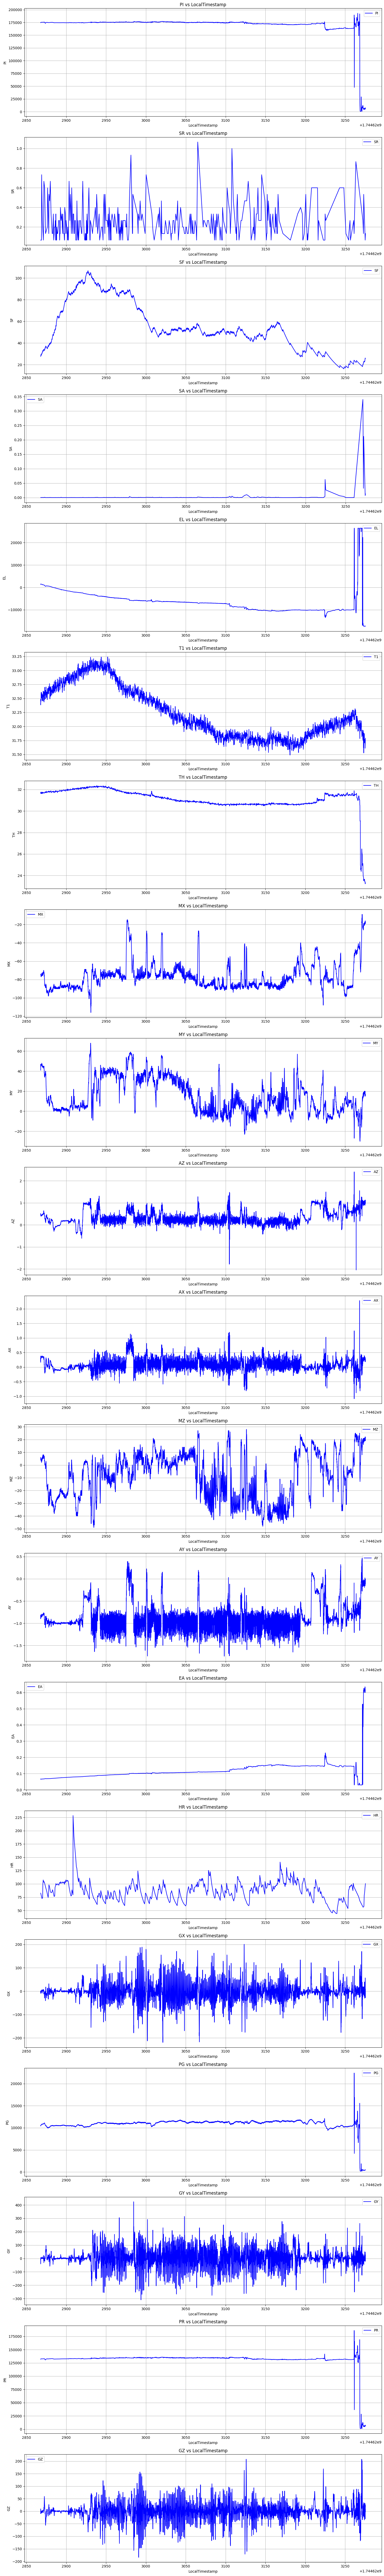

In [27]:
#Retrieving the metrics for a subject, plotting all of them to check raw data
#path = "/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/"
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT-SD-CARD/Record'
path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/TRIAL1'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Bogdan'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-2-Nostreaming'
#path='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-1/'
metrics = ["EA","EL","SA", "SR", "SF", "PI", "PR", "PG", "HR", "TH", "AX", "AY", "AZ", "GX", "GY", "GZ",
           "MX", "MY", "MZ", "T1", "DC", "DO", "UN"]

files = [file for file in os.listdir(path) if file.endswith(tuple(f'_{s}.csv' for s in metrics))]


data_dict = {}


for file in files:
    metric = file.split('_')[-1].replace('.csv', '')  
    
    df = pd.read_csv(os.path.join(path, file))  
    
    if 'LocalTimestamp' in df.columns:
        df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    else:
    
        continue  
    
    if metric not in df.columns:
        
        continue  

   
    data_dict[metric] = df


print(f" {list(data_dict.keys())}")


plt.figure(figsize=(15, 5 * len(data_dict)))  

for i, (metric, df) in enumerate(data_dict.items()):
    plt.subplot(len(data_dict), 1, i + 1)
    plt.plot(df['LocalTimestamp'], df[metric], label=metric, color='blue')
    plt.title(f'{metric} vs LocalTimestamp')
    plt.xlabel('LocalTimestamp')
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()


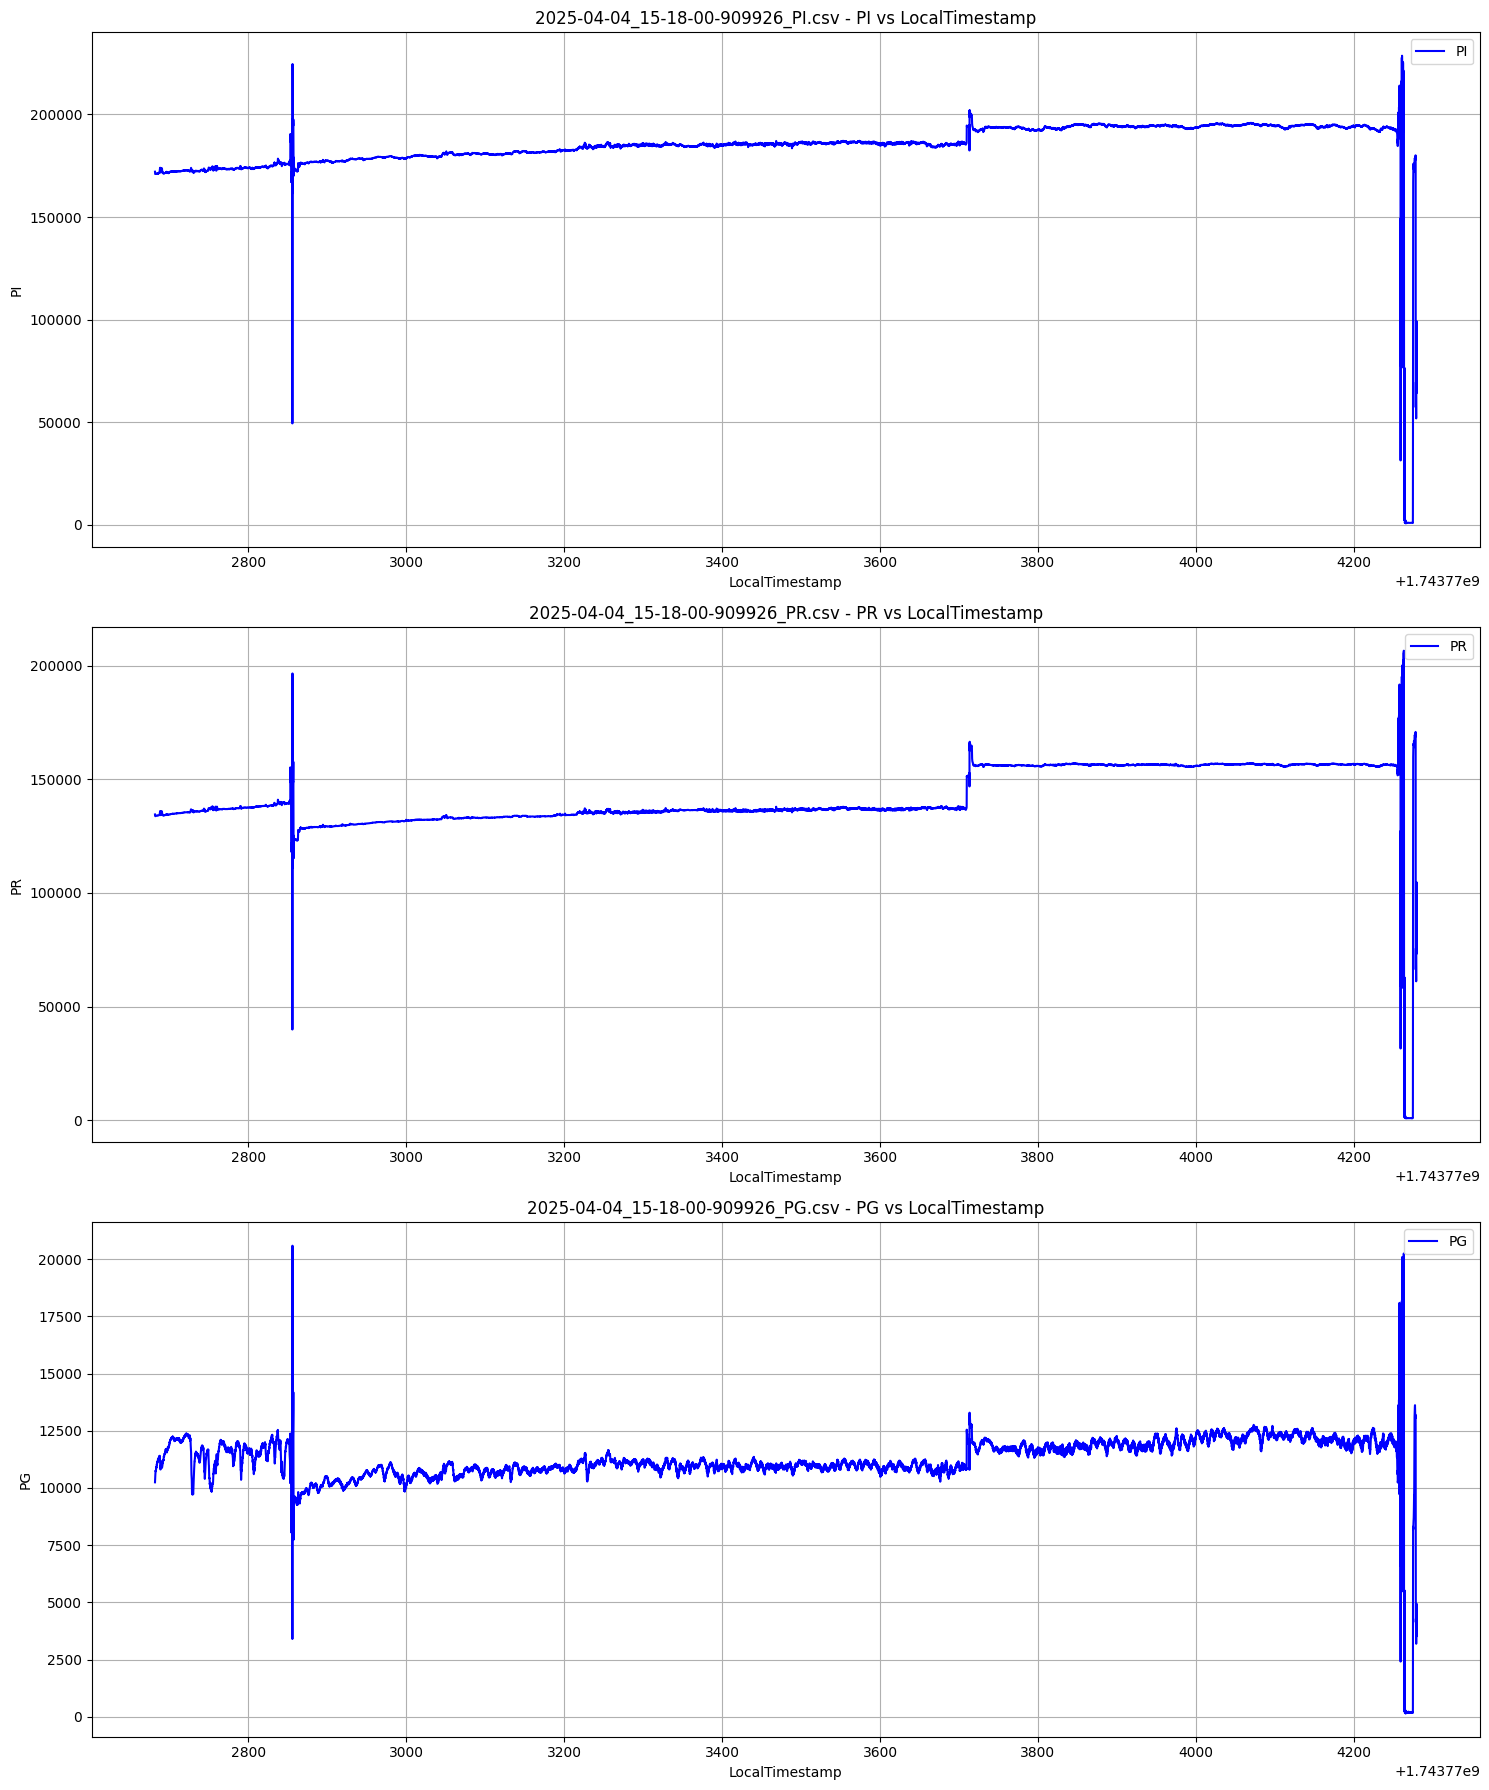

In [4]:


# Directorio donde se encuentran los archivos CSV
#directorio = '/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/Thomas-2-Nostreaming'
directorio='/Users/laura/Documents/EMOTIBIT/EMOTIBIT_DATA/untitled folder'

# Obtener todos los archivos CSV que terminan con PI y PG
archivos = [archivo for archivo in os.listdir(directorio) if archivo.endswith('PI.csv') or archivo.endswith('PG.csv')or archivo.endswith('PR.csv')]

# Inicializar la figura para los gráficos
plt.figure(figsize=(15, 18))

# Iterar sobre los archivos y graficar
for i, archivo in enumerate(archivos):
    # Leer el archivo CSV
    df = pd.read_csv(os.path.join(directorio, archivo))
    
    # Convertir LocalTimestamp a numérico
    df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
    
    # Asignar el nombre de la columna de acuerdo con el archivo
    if archivo.endswith('PI.csv'):
        columna_metrica = 'PI'
    elif archivo.endswith('PG.csv'):
        columna_metrica = 'PG'
    else:
        columna_metrica = 'PR'

    # Crear un subgráfico para cada archivo
    plt.subplot(len(archivos), 1, i + 1)  # Tres filas, una para cada gráfico
    plt.plot(df['LocalTimestamp'], df[columna_metrica], label=columna_metrica, color='blue')
    plt.title(f'{archivo} - {columna_metrica} vs LocalTimestamp')
    plt.xlabel('LocalTimestamp')
    plt.ylabel(columna_metrica)
    plt.grid(True)
    plt.legend()

# Ajustar la distribución de los gráficos y mostrar
plt.tight_layout()
plt.show()


In [19]:
df = data_dict.get("PG") 
df

,LocalTimestamp,EmotiBitTimestamp,PacketNumber,DataLength,TypeTag,ProtocolVersion,DataReliability,PG
0,1.744623e+09,23385.0,1385,13,PG,1,100,10494
1,1.744623e+09,23385.0,1385,13,PG,1,100,10474
2,1.744623e+09,23385.0,1385,13,PG,1,100,10457
3,1.744623e+09,23385.0,1385,13,PG,1,100,10437
4,1.744623e+09,23385.0,1385,13,PG,1,100,10444
...,...,...,...,...,...,...,...,...
10123,1.744623e+09,430810.0,1477,3,PG,1,100,464
10124,1.744623e+09,430850.0,1477,3,PG,1,100,484
10125,1.744623e+09,430890.0,1477,3,PG,1,100,480
10126,1.744623e+09,430930.0,1491,2,PG,1,100,467


In [20]:
#duration
import pandas as pd

df["Datetime"] = pd.to_datetime(df["LocalTimestamp"], unit="s")

# Duración total
duration = df["Datetime"].iloc[-1] - df["Datetime"].iloc[0]
print(f"Duration: {duration}")


Duration: 0 days 00:06:47.627769947


In [15]:
#PG
path='/Volumes/BOOTFS/2025-03-31_15-16-28-914179_PG.csv'
df = data_dict.get("PG") 
print(df.head())  
df_filt = df.iloc[:-3000].reset_index(drop=True)
df=df_filt


   LocalTimestamp  EmotiBitTimestamp  PacketNumber  DataLength TypeTag  \
0    1.744623e+09            23385.0          1385          13      PG   
1    1.744623e+09            23385.0          1385          13      PG   
2    1.744623e+09            23385.0          1385          13      PG   
3    1.744623e+09            23385.0          1385          13      PG   
4    1.744623e+09            23385.0          1385          13      PG   

   ProtocolVersion  DataReliability     PG  
0                1              100  10494  
1                1              100  10474  
2                1              100  10457  
3                1              100  10437  
4                1              100  10444  


In [63]:
df_filt = df.iloc[:-3000].reset_index(drop=True)
df=df_filt

df = df.iloc[400:].reset_index(drop=True)



In [21]:
import pandas as pd

# Usar .loc[] para evitar el SettingWithCopyWarning
df.loc[:, 'LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

# Ver los primeros valores para asegurarte que la conversión fue exitosa
print(df[['LocalTimestamp']].head())
df[['LocalTimestamp']]

df['TimeRelative'] = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]

df['TimeRelative_seconds'] = df['TimeRelative'].dt.total_seconds()

df['TimeRelative_seconds']


                 LocalTimestamp
0 2025-04-14 09:27:47.950252056
1 2025-04-14 09:27:47.950252056
2 2025-04-14 09:27:47.950252056
3 2025-04-14 09:27:47.950252056
4 2025-04-14 09:27:47.950252056


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_10114/976604166.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-14 09:27:47.950252056', '2025-04-14 09:27:47.950252056',
 '2025-04-14 09:27:47.950252056', '2025-04-14 09:27:47.950252056',
 '2025-04-14 09:27:47.950252056', '2025-04-14 09:27:47.950252056',
 '2025-04-14 09:27:47.950252056', '2025-04-14 09:27:47.950252056',
 '2025-04-14 09:27:47.950252056', '2025-04-14 09:27:47.950252056',
 ...
 '2025-04-14 09:34:35.217983961', '2025-04-14 09:34:35.257987976',
 '2025-04-14 09:34:35.297991991', '2025-04-14 09:34:35.337996006',
 '2025-04-14 09:34:35.378000975', '2025-04-14 09:34:35.418004990',
 '2025-04-14 09:34:35.458009005', '2025-04-14 09:34:35.498013020',
 '2025-04-14 09:34:35.538017035', '2025-04-14 09:34:35.578022003']
Length: 10128, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compati

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
10123    407.467753
10124    407.507757
10125    407.547761
10126    407.587765
10127    407.627770
Name: TimeRelative_seconds, Length: 10128, dtype: float64

In [22]:
df = df[(df["TimeRelative_seconds"] >= 200)]

4975     200.019987
4976     200.059991
4977     200.099995
4978     200.139999
4979     200.180004
            ...    
10123    407.467753
10124    407.507757
10125    407.547761
10126    407.587765
10127    407.627770
Name: TimeRelative_seconds, Length: 5153, dtype: float64


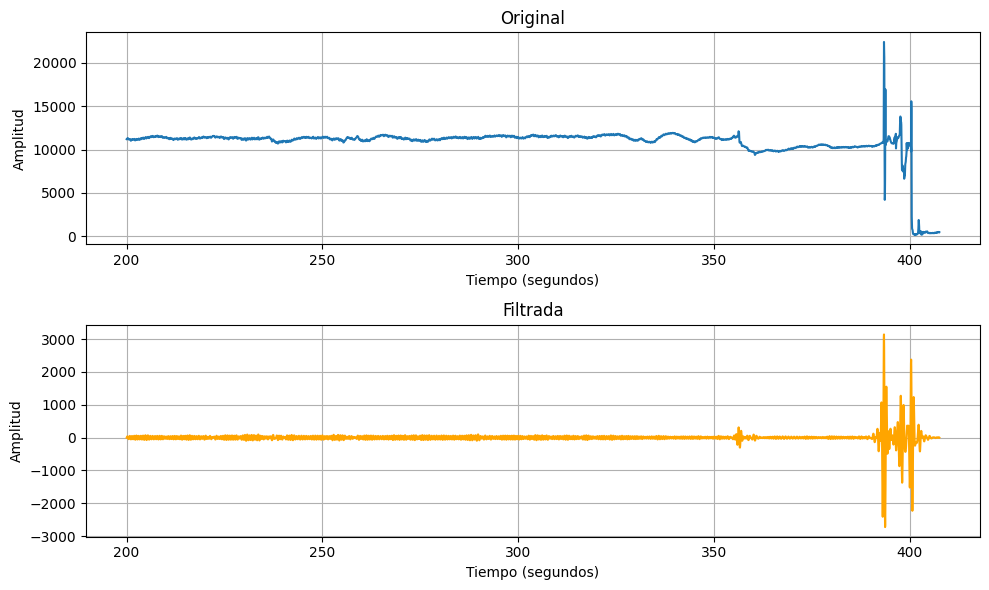

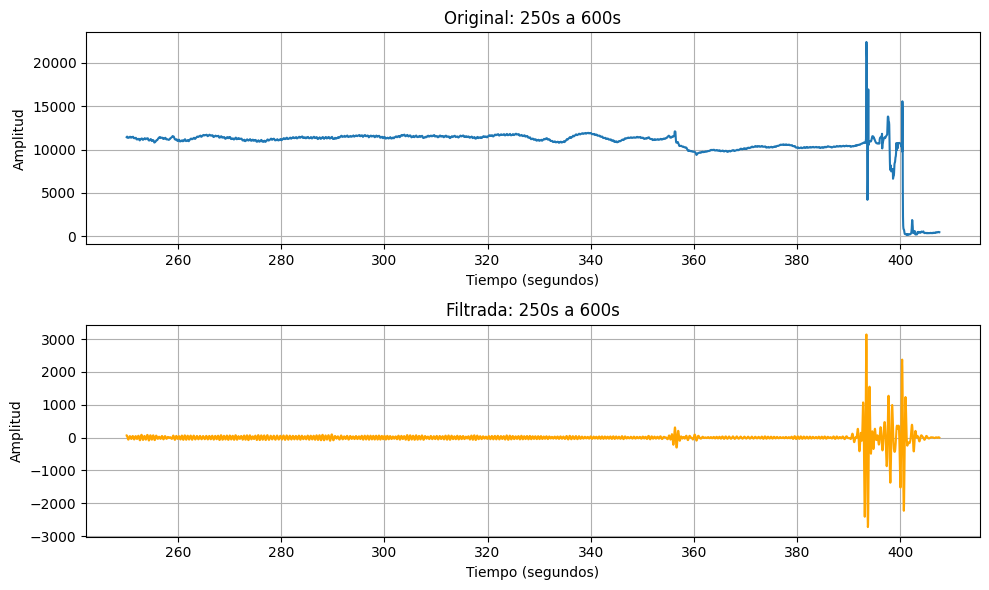

In [23]:

#FILTERED
ppg_signal =df['PG'] 
time_relative =df['TimeRelative_seconds']
print(time_relative)

# Chebyshev II filter 4th order
order = 4
lowcut = 1  # frecuencia de corte inferior
highcut = 2.0  # frecuencia de corte superior
fs = 25 # Tasa de muestreo (en Hz), EmotiBit sampling rate

#b, a = signal.cheby2(order, 40, [lowcut, highcut], fs=fs, btype='bandpass', analog=False)
b, a = signal.butter(order, [lowcut, highcut], fs=fs, btype='bandpass')
# Filtrar la señal
ppg_filtered = signal.filtfilt(b, a, ppg_signal)


# Graficar la señal original y filtrada
plt.figure(figsize=(10, 6))

# Graficar la señal original
plt.subplot(2, 1, 1)
plt.plot(time_relative, ppg_signal, label="Original")
plt.title('Original')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal filtrada
plt.subplot(2, 1, 2)
plt.plot(time_relative, ppg_filtered, label="Filtrada", color='orange')
plt.title('Filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Elegir una ventana de tiempo
t1 = 250  # hora de inicio
t2 = 600 # hora de finalización

# Filtrar los datos dentro de la ventana de tiempo
window = (time_relative >= t1) & (time_relative <= t2)
time_window = time_relative[window]
ppg_filtered_window = ppg_filtered[window]
ppg_signal_window = ppg_signal[window]

# Graficar la ventana de tiempo
plt.figure(figsize=(10, 6))

# Graficar la señal original en la ventana de tiempo
plt.subplot(2, 1, 1)
plt.plot(time_window, ppg_signal_window, label="Original")
plt.title(f'Original: {t1}s a {t2}s')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal filtrada en la ventana de tiempo
plt.subplot(2, 1, 2)
plt.plot(time_window, ppg_filtered_window, label="Filtrada", color='orange')
plt.title(f'Filtrada: {t1}s a {t2}s')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


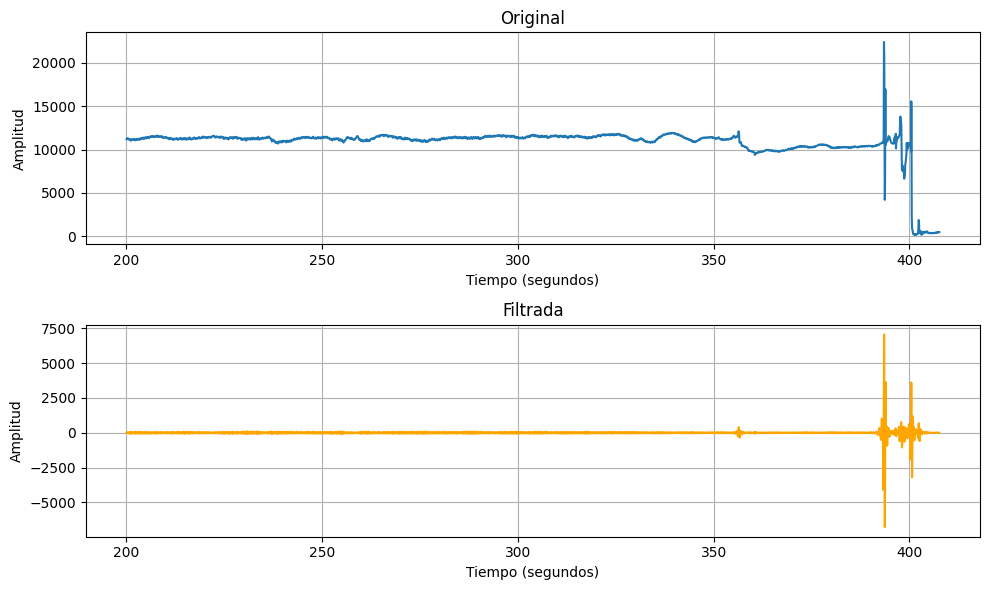

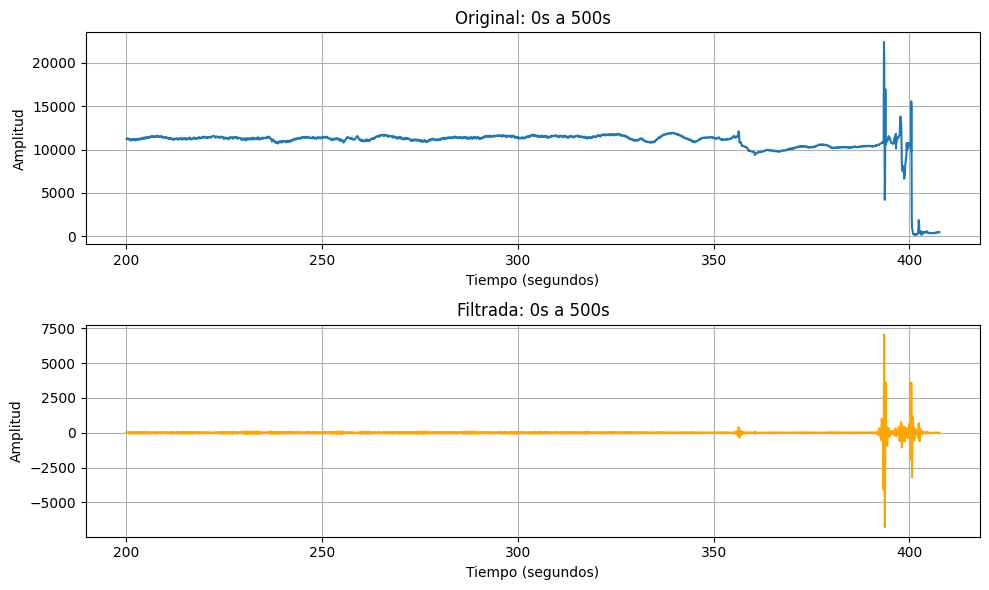

In [24]:

#FILTERED
time_relative =df['TimeRelative_seconds']


# Chebyshev II filter 4th order
order = 4
lowcut = 1.0  # frecuencia de corte inferior
highcut = 5.0  # frecuencia de corte superior
fs = 25  # Tasa de muestreo (en Hz), EmotiBit sampling rate

b, a = signal.cheby2(order, 40, [lowcut, highcut], fs=fs, btype='bandpass', analog=False)

# Filtrar la señal
ppg_filtered = signal.filtfilt(b, a, ppg_signal)

# Graficar la señal original y filtrada
plt.figure(figsize=(10, 6))

# Graficar la señal original
plt.subplot(2, 1, 1)
plt.plot(time_relative, ppg_signal, label="Original")
plt.title('Original')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal filtrada
plt.subplot(2, 1, 2)
plt.plot(time_relative, ppg_filtered, label="Filtrada", color='orange')
plt.title('Filtrada')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Elegir una ventana de tiempo
t1 = 0  # hora de inicio
t2 = 500  # hora de finalización

# Filtrar los datos dentro de la ventana de tiempo
window = (time_relative >= t1) & (time_relative <= t2)
time_window = time_relative[window]
ppg_filtered_window = ppg_filtered[window]
ppg_signal_window = ppg_signal[window]

# Graficar la ventana de tiempo
plt.figure(figsize=(10, 6))

# Graficar la señal original en la ventana de tiempo
plt.subplot(2, 1, 1)
plt.plot(time_window, ppg_signal_window, label="Original")
plt.title(f'Original: {t1}s a {t2}s')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal filtrada en la ventana de tiempo
plt.subplot(2, 1, 2)
plt.plot(time_window, ppg_filtered_window, label="Filtrada", color='orange')
plt.title(f'Filtrada: {t1}s a {t2}s')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_10114/380275948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')


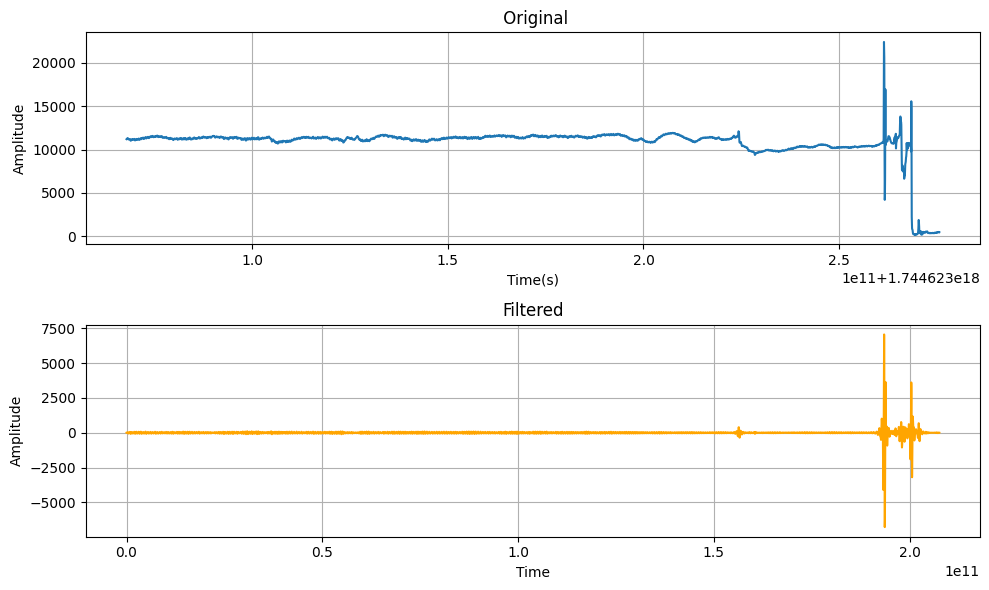

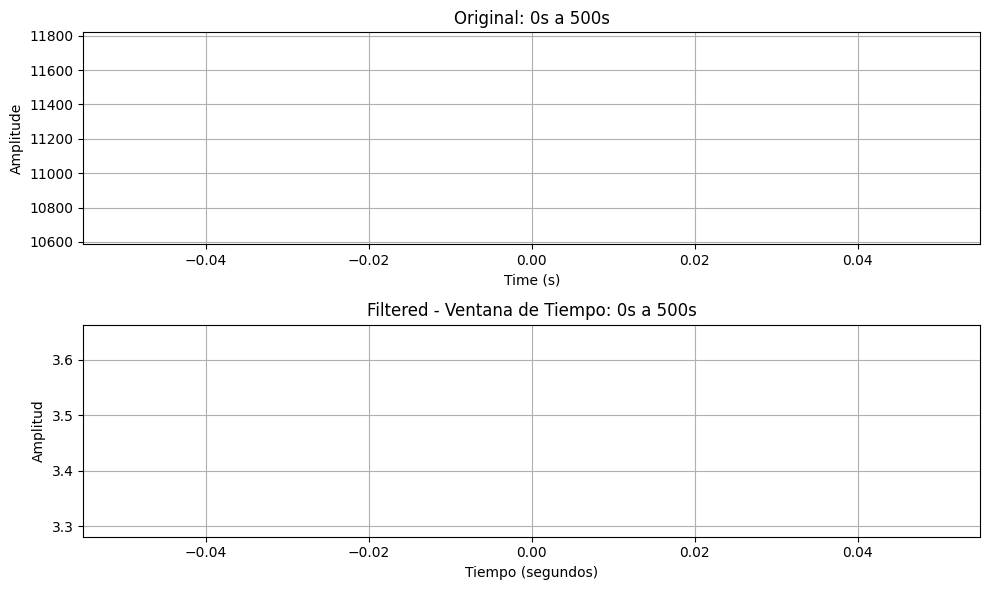

In [25]:
# filtered 


df['LocalTimestamp'] = pd.to_numeric(df['LocalTimestamp'], errors='coerce')
ppg_signal =df['PG']  
time = df['LocalTimestamp']
time_relative = df['LocalTimestamp'] - df['LocalTimestamp'].iloc[0]


#Chebyshev II filter  4th order
order = 4  
lowcut = 1.0  #
highcut = 5.0 # aliasing, the freq can not be higher than fs/2
fs = 25 # emotibit sampling rate for PG, PI, PR


b, a = signal.cheby2(order, 40, [lowcut, highcut], fs=fs, btype='bandpass', analog=False)

# Filtered signal
ppg_filtered = signal.filtfilt(b, a, ppg_signal)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, ppg_signal, label="Original")
plt.title(' Original')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_relative, ppg_filtered, label="Filtered", color='orange')
plt.title('Filtered')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Choosing a window


t1 = 0  # start time
t2 = 500  #end time

window = (time_relative >= t1) & (time_relative <= t2)
time_window = time_relative[window]
ppg_filtered_window = ppg_filtered[window]



plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(time_window, ppg_signal[window], label="Original")
plt.title(f'Original: {t1}s a {t2}s')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(time_window, ppg_filtered_window, label="Filtrada", color='orange')
plt.title(f'Filtered - Ventana de Tiempo: {t1}s a {t2}s')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

KeyError: '[8, 21, 49, 62, 77, 90, 105, 120, 136, 151, 166, 181, 195, 210, 223, 238, 251, 264, 291, 305, 319, 332, 345, 359, 372, 387, 400, 415, 429, 444, 458, 473, 487, 502, 516, 529, 543, 558, 571, 584, 597, 612, 625, 641, 654, 669, 682, 697, 724, 737, 752, 765, 779, 793, 807, 822, 835, 849, 863, 876, 902, 916, 941, 966, 980, 1004, 1017, 1032, 1047, 1062, 1078, 1093, 1109, 1124, 1139, 1153, 1168, 1182, 1197, 1212, 1227, 1243, 1257, 1271, 1285, 1299, 1313, 1327, 1342, 1356, 1369, 1383, 1399, 1412, 1426, 1453, 1467, 1493, 1507, 1521, 1535, 1550, 1565, 1580, 1595, 1609, 1625, 1639, 1654, 1667, 1682, 1695, 1710, 1724, 1738, 1752, 1766, 1779, 1793, 1807, 1820, 1835, 1861, 1875, 1889, 1904, 1919, 1935, 1950, 1966, 1981, 1997, 2012, 2027, 2042, 2056, 2071, 2085, 2099, 2113, 2128, 2141, 2156, 2170, 2184, 2199, 2213, 2228, 2244, 2259, 2273, 2289, 2302, 2317, 2331, 2345, 2360, 2373, 2388, 2401, 2414, 2429, 2442, 2456, 2469, 2482, 2495, 2509, 2522, 2537, 2550, 2578, 2591, 2606, 2620, 2634, 2649, 2663, 2677, 2691, 2705, 2720, 2734, 2749, 2762, 2777, 2791, 2805, 2819, 2833, 2847, 2860, 2886, 2901, 2914, 2928, 2942, 2958, 2971, 2985, 3000, 3013, 3028, 3042, 3057, 3071, 3085, 3099, 3114, 3127, 3141, 3155, 3168, 3182, 3195, 3208, 3222, 3235, 3249, 3262, 3275, 3288, 3301, 3315, 3330, 3345, 3359, 3374, 3389, 3404, 3419, 3433, 3447, 3461, 3475, 3489, 3502, 3516, 3529, 3543, 3556, 3570, 3583, 3597, 3612, 3625, 3640, 3654, 3668, 3683, 3697, 3711, 3726, 3739, 3753, 3768, 3782, 3796, 3810, 3834, 3852, 3867, 3881, 3908, 3922, 3935, 3948, 3961, 3988, 4012, 4026, 4053, 4067, 4080, 4095, 4109, 4125, 4141, 4159, 4178, 4197, 4215, 4233, 4250, 4267, 4283, 4298, 4313, 4328, 4343, 4357, 4372, 4386, 4401, 4414, 4428, 4442, 4456, 4471, 4486, 4501, 4515, 4530, 4544, 4558, 4573, 4587, 4601, 4615, 4629, 4644, 4659, 4674, 4689, 4704, 4720, 4735, 4756, 4772, 4787, 4802, 4818, 4831, 4845, 4859, 4874, 4895, 4910, 4926, 4945, 4959, 4974] not in index'

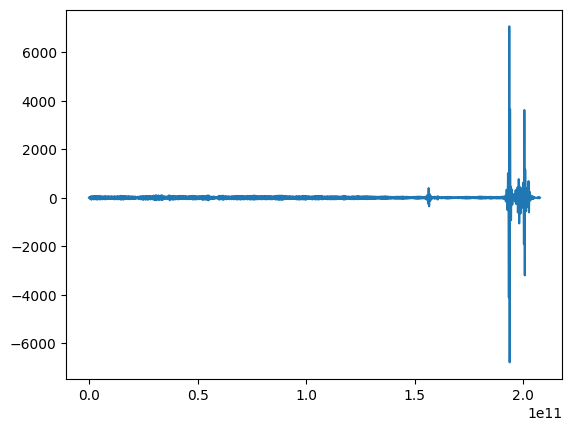

In [26]:
from scipy.signal import find_peaks

# peaks
peaks, _ = find_peaks(ppg_filtered, distance=fs/2) 
peak_times = time_relative.iloc[peaks]
# Graficar los picos
plt.plot(time_relative, ppg_filtered)
plt.plot(time_relative[peaks], ppg_filtered[peaks], "x")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("peaks")
plt.show()



rr_intervals = np.diff(peak_times) 
heart_rate = 60 / np.mean(rr_intervals) 

heart_rate

In [556]:

t_domain=get_time_domain_features(rr_intervals)
t_domain

NameError: name 'HRV' is not defined

/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/analysis.py:677: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  interp = UnivariateSpline(x, rrlist, k=3)
/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


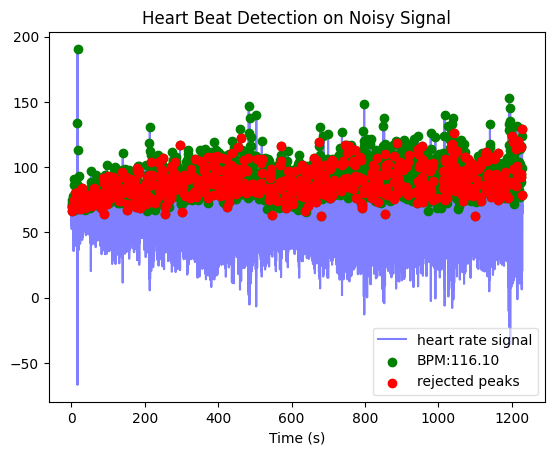

In [544]:

data=ppg_filtered

time=time_relative

working_data, measures = hp.process(data, sample_rate = 24)

#plot with different title
hp.plotter(working_data, measures, title='Heart Beat Detection on Noisy Signal')

In [524]:
wd, m = hp.process(rr_intervals, sample_rate = 24)
m 

{'bpm': np.float64(149.61038961038963),
 'ibi': np.float64(401.04166666666663),
 'sdnn': np.float64(140.43196627825796),
 'sdsd': np.float64(165.41194367732675),
 'rmssd': np.float64(259.54019170662394),
 'pnn20': 0.8,
 'pnn50': 0.8,
 'hr_mad': np.float64(125.0),
 'sd1': np.float64(163.93596310754998),
 'sd2': np.float64(119.89578808281797),
 's': np.float64(61748.730859545576),
 'sd1/sd2': np.float64(1.3673204516101205),
 'breathingrate': np.float64(0.1558846453624318)}

In [518]:
data=ppg_filtered_window

time=time_window

wd, m = hp.process(data, sample_rate = 24)
m 

/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/analysis.py:677: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  interp = UnivariateSpline(x, rrlist, k=3)


{'bpm': np.float64(117.399577167019),
 'ibi': np.float64(511.0750945434901),
 'sdnn': np.float64(112.23053382237701),
 'sdsd': np.float64(85.57484147698305),
 'rmssd': np.float64(178.53221696660236),
 'pnn20': 0.9201596806387226,
 'pnn50': 0.8163672654690619,
 'hr_mad': np.float64(83.33333333333337),
 'sd1': np.float64(126.2334512859758),
 'sd2': np.float64(94.23723853468276),
 's': np.float64(37372.046474937706),
 'sd1/sd2': np.float64(1.3395283356007643),
 'breathingrate': np.float64(0.22213054929711545)}

In [520]:
data=ppg_filtered

time=time_relative

wd, m = hp.process(data, sample_rate = 24)
m

/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/analysis.py:677: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  interp = UnivariateSpline(x, rrlist, k=3)


{'bpm': np.float64(116.0977188157256),
 'ibi': np.float64(516.8060200668897),
 'sdnn': np.float64(113.74845728916567),
 'sdsd': np.float64(85.5761296334326),
 'rmssd': np.float64(187.70981364720524),
 'pnn20': 0.9373996789727127,
 'pnn50': 0.833868378812199,
 'hr_mad': np.float64(124.99999999999994),
 'sd1': np.float64(132.71601960877214),
 'sd2': np.float64(88.84995150354852),
 's': np.float64(37045.069656350104),
 'sd1/sd2': np.float64(1.4937095334652115),
 'breathingrate': np.float64(0.0)}

/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 2000x1000 with 0 Axes>

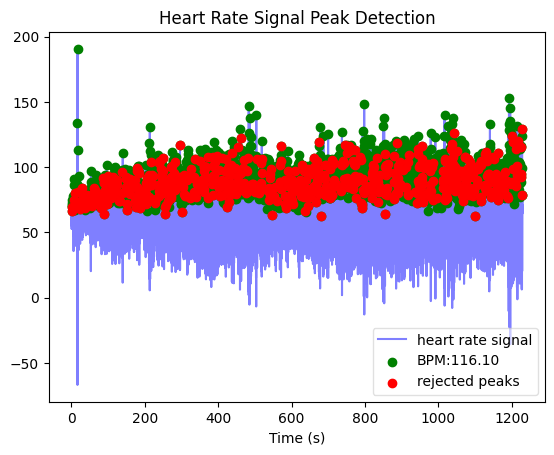

In [487]:
import math
plt.figure(figsize=(20,10))

hp.plotter(wd, m)



In [501]:
t_domain=get_time_domain_features(ppg_filtered)
t_domain

{'mean_nni': np.float64(1.1600083530978942),
 'sdnn': np.float64(19.739661415550565),
 'sdsd': np.float64(11.334765542584886),
 'nni_50': np.int64(12),
 'pnni_50': np.float64(0.04069866033576395),
 'nni_20': np.int64(2436),
 'pnni_20': np.float64(8.261828048160082),
 'rmssd': np.float64(11.334765546117335),
 'median_nni': np.float64(2.200750371927464),
 'range_nni': np.float64(257.51730986674147),
 'cvsd': np.float64(9.771279246263138),
 'cvnni': np.float64(17.01682695890442),
 'mean_hr': np.float64(-2418.9736408703243),
 'max_hr': np.float64(43916947.72047849),
 'min_hr': np.float64(-117296178.89171806),
 'std_hr': np.float64(780687.777772915)}

In [489]:
#HRV
f_domain_features = get_frequency_domain_features(ppg_filtered)
f_domain_features

/opt/anaconda3/envs/EmotiBit-pyenv/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 137, using nperseg = 137
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


{'lf': np.float64(16.03745800999902),
 'hf': np.float64(24.339047143423493),
 'lf_hf_ratio': np.float64(0.6589188933935898),
 'lfnu': np.float64(39.71977750194065),
 'hfnu': np.float64(60.28022249805935),
 'total_power': np.float64(46.99444405207057),
 'vlf': np.float64(6.617938898648054)}

In [491]:
df = data_dict.get("HR") 
print(df.head())  
media_hr = df['HR'].mean()
print(media_hr)
media_hr

np.float64(75.28591973244147)

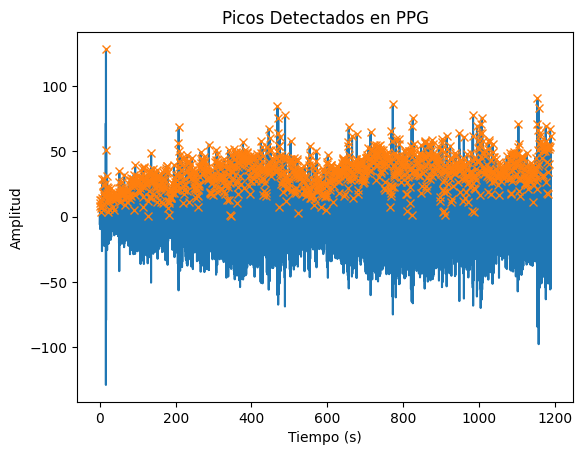

np.float64(64.61318532992375)

In [493]:
from scipy.signal import find_peaks

# Detecta los picos en los datos de PPG
peaks, _ = find_peaks(ppg_filtered, distance=fs/2) 

# Graficar los picos
plt.plot(time_relative, ppg_filtered)
plt.plot(time_relative[peaks], ppg_filtered[peaks], "x")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Picos Detectados en PPG")
plt.show()

# Calcular la frecuencia cardíaca
peak_times = time_relative[peaks]
rr_intervals = np.diff(peak_times)  # Intervalos entre picos
heart_rate = 60 / np.mean(rr_intervals)  # Frecuencia cardíaca en bpm
print(f"Frecuencia cardíaca estimada: {heart_rate} bpm")
heart_rate

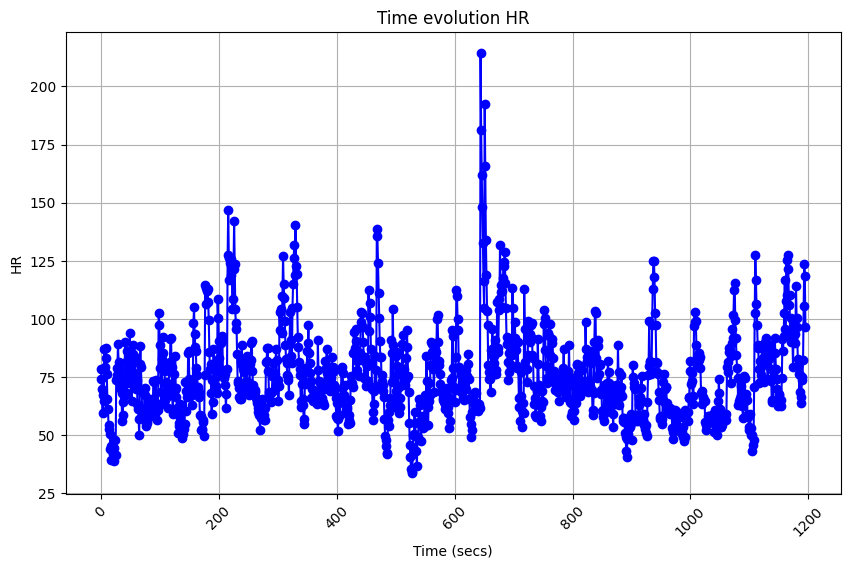

In [495]:
df
df['LocalTimestamp'] = pd.to_datetime(df['LocalTimestamp'], unit='s')

# Análisis descriptivo de HR
print(df['HR'].describe())


df['time_in_seconds'] = df.index

# Graficar la evolución de HR en el tiempo (usando el índice como tiempo en segundos)
plt.figure(figsize=(10,6))
plt.plot(df['time_in_seconds'], df['HR'], marker='o', linestyle='-', color='b')
plt.title("Time evolution HR")
plt.xlabel("Time (secs)")
plt.ylabel("HR")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [2]:
#EA
df = data_dict.get("EA") 
print(df.head())  
df

NameError: name 'data_dict' is not defined

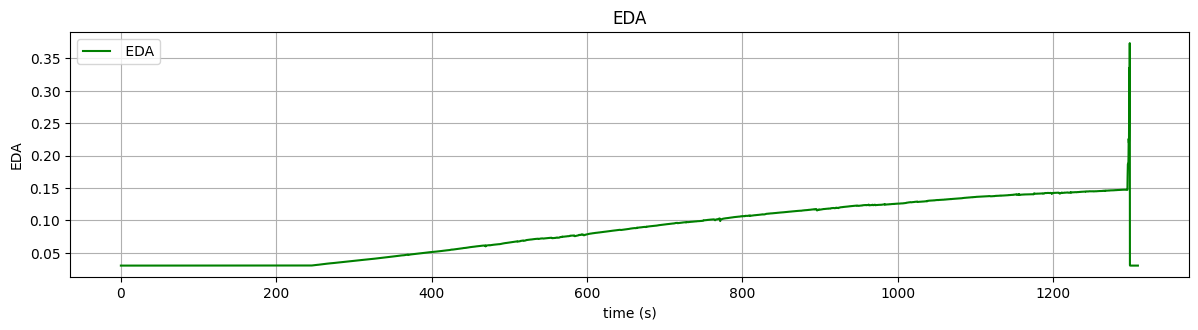

In [12]:



time_eda = df.index * (1 / 15)  # 15 Hz


data_eda = df




plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(time_eda, data_eda, label=" EDA", color='g')
plt.xlabel("time (s)")
plt.ylabel("EDA")
plt.title("EDA")
plt.legend()
plt.grid(True)


plt.tight_layout()  
plt.show()



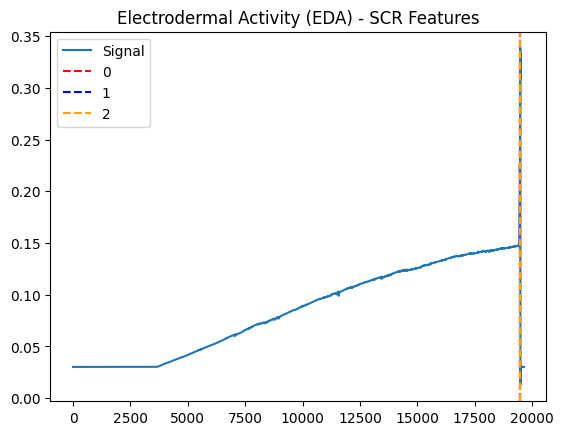

<Figure size 1200x600 with 0 Axes>

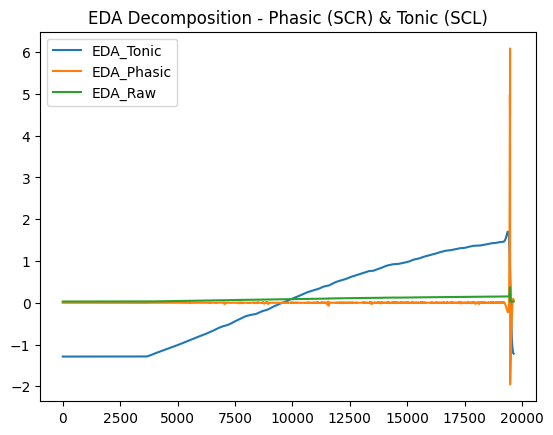

Feature Summary:
Mean EDA: 0.0846
Std EDA: 0.0422
Number of SCR Peaks: 2.0000
Mean SCR Peak Height: 0.0791


In [13]:
#EDA


signals, info = nk.eda_process(df, sampling_rate=15) 


scr_onsets = info["SCR_Onsets"]
scr_peaks = info["SCR_Peaks"]
scr_recovery = info["SCR_Recovery"]

# Plotting
nk.events_plot([scr_onsets, scr_peaks, scr_recovery], signals["EDA_Clean"], color=['red', 'blue', 'orange'])
plt.title("Electrodermal Activity (EDA) - SCR Features")
plt.show()

# SCl and SCR computing ( tonic and phasic)
data = nk.eda_phasic(nk.standardize(df), sampling_rate=15)
data["EDA_Raw"] = df  


plt.figure(figsize=(12, 6))
data.plot()
plt.title("EDA Decomposition - Phasic (SCR) & Tonic (SCL)")
plt.show()


features = {
    "Mean EDA": signals["EDA_Clean"].mean(),
    "Std EDA": signals["EDA_Clean"].std(),
    "Number of SCR Peaks": len(scr_peaks),
    "Mean SCR Peak Height": signals.loc[scr_peaks, "SCR_Amplitude"].mean() if len(scr_peaks) > 0 else 0,
}

print("Feature Summary:")
for key, value in features.items():
    print(f"{key}: {value:.4f}")


        Red        IR    Green
0  180554.0  133388.0  10788.0
1  180586.0  133387.0  10802.0
2  180591.0  133415.0  10792.0
3  180520.0  133384.0  10788.0
4  180429.0  133348.0  10793.0


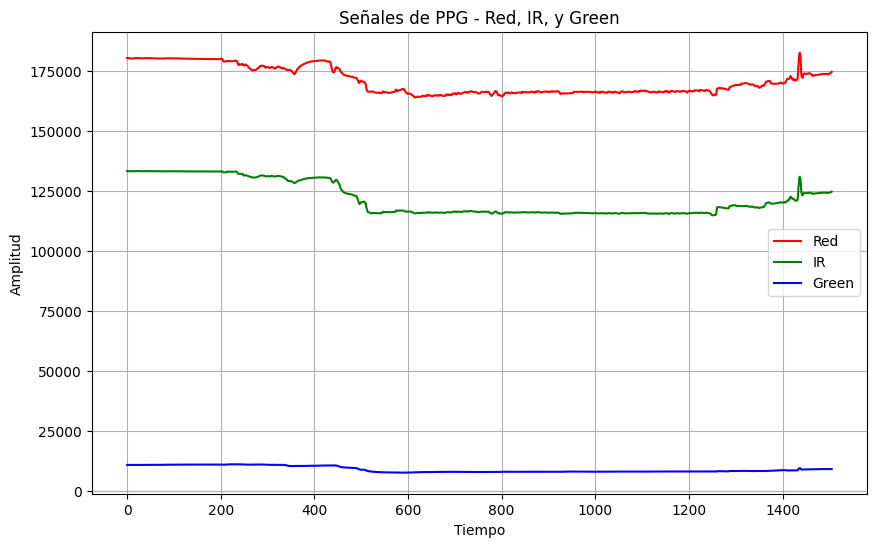

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/laura/Documents/EMOTIBIT/Emotibit_data-script_ppg.csv', header=None, delimiter="\t")
# Asumimos que la primera columna (índice 0) contiene los tiempos o que es la columna con las mediciones
# Si la primera columna contiene valores de tiempo en segundos, podemos usarlo directamente

# Crear un eje de tiempo, asumiendo que la frecuencia de muestreo es 25 Hz (0.04 segundos entre muestras)
time = df.index * 0.04 

# Crear una nueva DataFrame solo con las columnas de interés para PPG
ppg_data = df[[1, 2, 3]]  # Se asume que estas son las columnas correspondientes a RED, IR, y GREEN

# Renombramos las columnas para hacerlo más claro
ppg_data.columns = ['Red', 'IR', 'Green']

# Verificar los datos
print(ppg_data.head())

# Si queremos visualizar estos datos en un gráfico, podemos hacerlo de la siguiente manera:
plt.figure(figsize=(10, 6))

# Graficar las señales de las diferentes longitudes de onda
plt.plot(ppg_data['Red'], label='Red', color='red')
plt.plot(ppg_data['IR'], label='IR', color='green')
plt.plot(ppg_data['Green'], label='Green', color='blue')

plt.title('Señales de PPG - Red, IR, y Green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

def butter_lowpass_filter(data, cutoff=0.5, fs=10, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def calculate_snr(signal, noise_level=0.01):
    signal_power = np.mean(np.square(signal))
    noise_power = noise_level ** 2
    return 10 * np.log10(signal_power / noise_power)

def detect_outliers(signal, threshold=3):
    z_scores = np.abs(zscore(signal))
    return np.where(z_scores > threshold)[0]

# Cargar datos (asegúrate de que el archivo tenga una columna 'EDA')
df = pd.read_csv("tus_datos.csv")  # Reemplaza con tu archivo

# Filtrado de la señal
eda_signal = df["EDA"].dropna()
eda_filtered = butter_lowpass_filter(eda_signal, cutoff=0.5, fs=10)

# Detección de artefactos
outliers = detect_outliers(eda_filtered)

# Cálculo de SNR
snr_value = calculate_snr(eda_filtered)

# Evaluación de fiabilidad
data_reliability = df.get("DataReliability", pd.Series(np.ones(len(df)) * 100))
mean_reliability = np.mean(data_reliability)

# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.plot(eda_signal, label="Señal Original", alpha=0.5)
plt.plot(eda_filtered, label="Señal Filtrada", linewidth=2)
plt.scatter(outliers, eda_filtered[outliers], color='red', label="Artefactos")
plt.xlabel("Tiempo")
plt.ylabel("EDA (µS)")
plt.title("Evaluación de Calidad de Señal EDA")
plt.legend()
plt.show()

# Resultados
print(f"Número de artefactos detectados: {len(outliers)}")
print(f"SNR de la señal: {snr_value:.2f} dB")
print(f"Promedio de fiabilidad de datos: {mean_reliability:.2f}%")

if mean_reliability < 90:
    print("Advertencia: La fiabilidad de los datos es baja.")


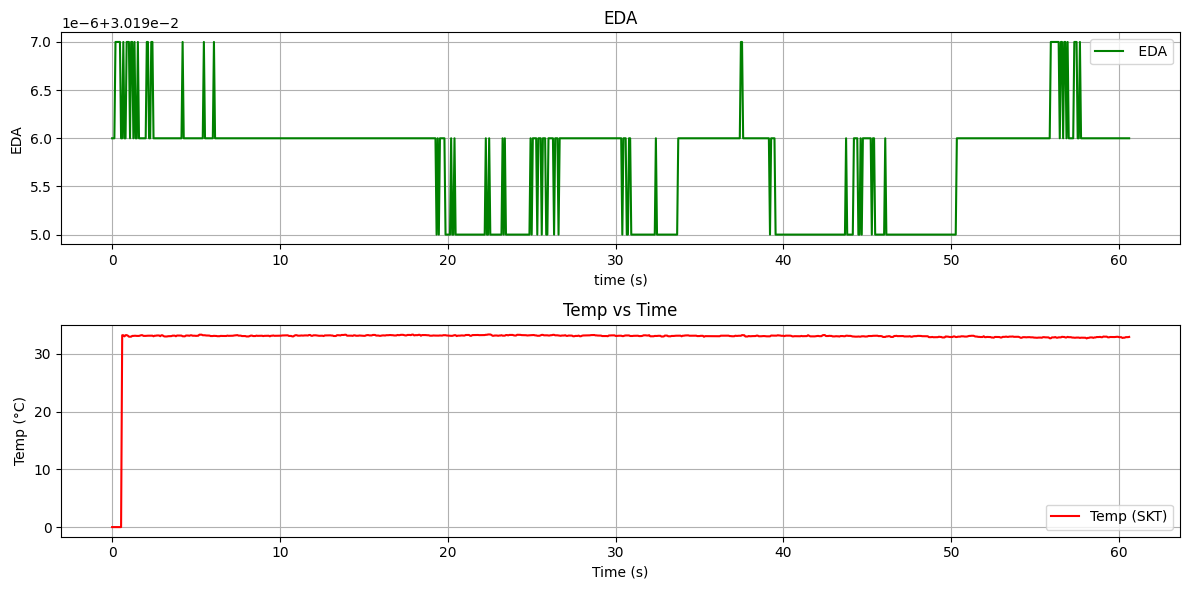

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/laura/Documents/EMOTIBIT/Emotibit_data-script_eda.csv', header=None, delimiter="\t")


time_eda = df.index * (1 / 15)  # 15 Hz
time_skt = df.index * (1 / 15)  # 7.5 Hz


data_eda = df[1]

data_skt = df[2]


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(time_eda, data_eda, label=" EDA", color='g')
plt.xlabel("time (s)")
plt.ylabel("EDA")
plt.title("EDA")
plt.legend()
plt.grid(True)

# Graficar Temperatura (SKT)
plt.subplot(2, 1, 2)
plt.plot(time_skt, data_skt, label="Temp (SKT)", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Temp (°C)")
plt.title("Temp vs Time")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio entre subgráficos
plt.show()

